# Poisson equation in a unit square

We begin with a canonical model problem of solving the Poisson problem in $\Omega = (0,1)^2$.

## Mesh generation

First we generate a mesh. The meshes are subclasses of skfem.mesh.Mesh and their constructors automatically build a mesh for the unit square.

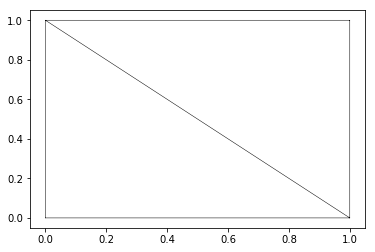

In [17]:
%cd ..
%matplotlib inline

from skfem import *

m = MeshTri()
m.draw()

The meshes can be refined using the method *refine* as follows:

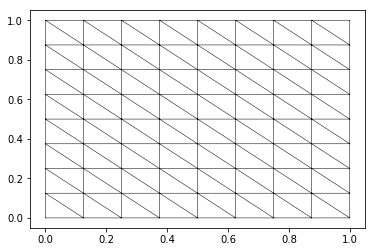

In [18]:
m.refine(3)
m.draw()

Different initial meshes can be obtained using the constructor argument *initmesh*. See *help(MeshTri)* for more information:

In [20]:
help(MeshTri)

Help on class MeshTri in module skfem.mesh:

class MeshTri(Mesh2D)
 |  A mesh consisting of triangular elements.
 |  
 |  Attributes
 |  ----------
 |  p : numpy array of size 2 x Nvertices
 |      The vertices of the mesh
 |  t : numpy array of size 3 x Nelements
 |      The element connectivity
 |  facets : numpy array of size 2 x Nfacets
 |      Each column contains a pair of indices to p.
 |  f2t : numpy array of size 2 x Nfacets
 |      Each column contains a pair of indices to t
 |      or -1 on the second row if the facet is on
 |      the boundary.
 |  t2f : numpy array of size 3 x Nelements
 |      Each column contains three indices to facets.
 |  
 |  Method resolution order:
 |      MeshTri
 |      Mesh2D
 |      Mesh
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, p=None, t=None, validate=True, initmesh=None, sort_t=True)
 |      Initialize a triangular mesh.
 |      
 |      Parameters
 |      ----------
 |      p : (optional) numpy array of 

## Element definition

The library supports various finite elements. We begin with the simplest one, that is, the piecewise linear element for triangular meshes.

In [21]:
e = ElementTriP1()

The created object contains information on the reference element, local basis functions and how the basis function values are transformed from the reference element to the global element.

## Global finite element basis

Next we combine the mesh and the element definition to form a global basis. The third argument is the quadrature order.

In [23]:
basis = InteriorBasis(m, e, MappingAffine(m), 1)

The *basis* object contains the global basis functions evaluated at the global quadrature points.

## The assembly

Next we define the bilinear and linear forms and assemble them. A custom bilinear form is defined using the *@bilinear_form* decorator and assembled using the function *skfem.assembly.asm* as follows:

In [25]:
@bilinear_form
def poisson(u, du, v, dv, w):
    return du[0]*dv[0] + du[1]*dv[1]

A = asm(poisson, basis)

We can now visualize the sparsity pattern of the resulting stiffness matrix *A*.

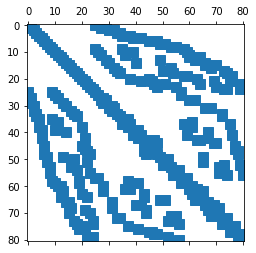

In [26]:
from matplotlib.pyplot import spy
spy(A)

A linear form is defined similarly.

In [28]:
@linear_form
def load(v, dv, w):
    return 1.0*v

b = asm(load, basis)

## Boundary conditions and solving the system

We now have the linear system assembled and what remains is setting the boundary conditions and solving the linear system.

For setting Dirichlet boundary conditions, a useful command is *skfem.utils.condense* which can be used for eliminating degrees-of-freedom that are known a priori. The matrix $A$ is an assembled SciPy CSR matrix that can be fed to any linear solver. SciPy solvers can be used through the command *solve* as follows: 

In [29]:
x = solve(*condense(A, b, I=m.interior_nodes()))

## Visualizing the result

The solution $x$ now contains the values at the interior nodes. For visualization we wish to create an expanded vector that includes the zero boundary values. Visualization can be done using *skfem.mesh.MeshTri.plot3*.

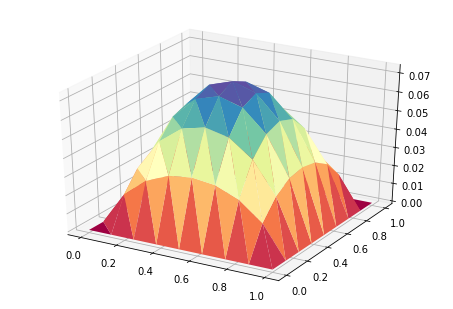

In [30]:
y = 0*b # create a zero vector
y[m.interior_nodes()] = x # expand the solution vector
m.plot3(y)

That's it! Hopefully you get an idea for the basic workflow of using the library. See the *examples* folder for more use cases.